**Text Classification with Naive Bayes**

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics

newsgroups = fetch_20newsgroups(subset='all')
X, y = newsgroups.data, newsgroups.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

text_clf.fit(X_train, y_train)


y_pred = text_clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.88      0.72      0.79       198
           1       0.86      0.79      0.82       245
           2       0.88      0.83      0.85       242
           3       0.66      0.86      0.75       238
           4       0.95      0.84      0.89       250
           5       0.96      0.80      0.87       260
           6       0.96      0.66      0.78       241
           7       0.89      0.93      0.91       244
           8       0.91      0.95      0.93       219
           9       0.96      0.94      0.95       261
          10       0.90      0.98      0.94       245
          11       0.78      0.98      0.87       251
          12       0.92      0.80      0.86       249
          13       0.97      0.88      0.92       249
          14       0.88      0.98      0.93       240
          15       0.49      0.99      0.66       245
          16       0.78      0.96      0.86       230
          17       0.93    

**Golf Dataset Classification with Naive Bayes**

In [3]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'PlayGolf': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)


df = pd.get_dummies(df, columns=['Outlook', 'Temperature', 'Humidity', 'Windy'])
X = df.drop(columns=['PlayGolf'])
y = df['PlayGolf'].map({'No': 0, 'Yes': 1})


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



**Visual Representation**

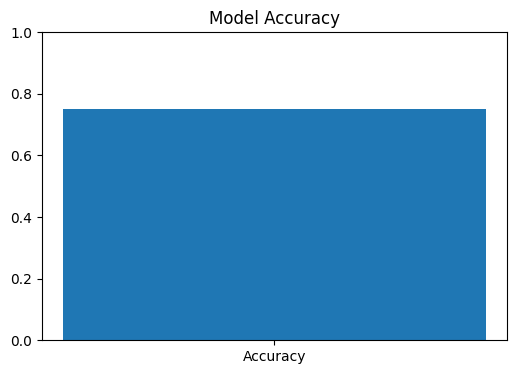

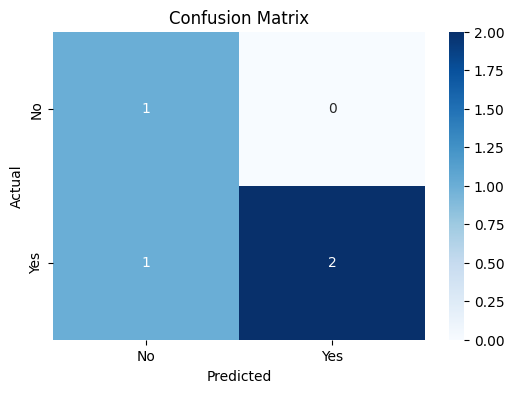

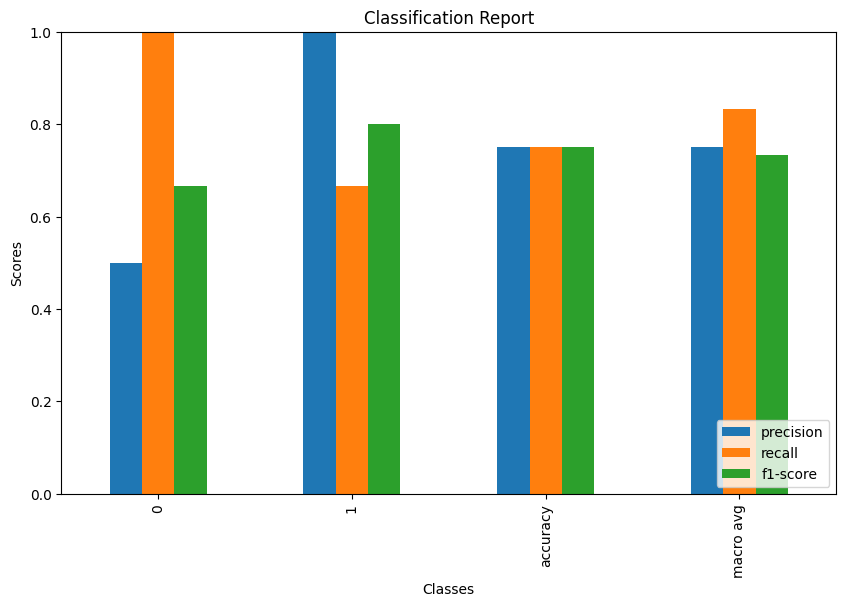

In [5]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'PlayGolf': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

# DataFrame
df = pd.DataFrame(data)

# One-hot encoding
df = pd.get_dummies(df, columns=['Outlook', 'Temperature', 'Humidity', 'Windy'])
X = df.drop(columns=['PlayGolf'])
y = df['PlayGolf'].map({'No': 0, 'Yes': 1})

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Accuracy Bar Plot
plt.figure(figsize=(6,4))
plt.bar(['Accuracy'], [accuracy])
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report Bar Plot
report_df = pd.DataFrame(report).transpose()
report_df = report_df.iloc[:-1, :-1]
report_df.plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report')
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()

